<a href="https://colab.research.google.com/github/Niniola20/Cyber_jobs/blob/main/Cyber_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This data set is used to show that entry level cybesecurity job gaps in the United States. This data shows the demand of cybersecurity in both public and private sectors. The data calculates the geographic concentration and supply of cybersecurity workers. These are used to gives viewers an understanding of the gap in cybersecurity in different locations in the United States. The website inwhich this information was gotten is by Cyberseek and is an interactive map that can also be additionally utilized by users to gain more information on this topic. In the dataset, we have information on. :

1. State
2. Social job sector.
3. Total job openings: Shows the online listing of cyberscueity jobs from March 2020- April 2021.
4. Geographic Concentration:Concentration of cybersecurity job demand in a certain location. The national average is 1. 
5. Supply of cybersecurity workers: Comparison of currently employed cybersecurity workers relative to demand per location. The national average is 3.8 and cybersecurity average is 2.1.
6. Total employed cybersecurity workforce: Shows the number of workers employed in cybersecurity related jobs from March 2020- April 2021.


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
!pip install plotly
!pip install plotly-geo
!pip install geopandas --upgrade
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install chart_studio

#Reading CSV file from directory

In [ ]:
Cyber_jobs=pd.read_excel("Cyber_jobs.xlsx")

#Listing directory

In [ ]:
os.listdir(".")

['.config', 'Cyber_jobs.xlsx', 'sample_data']

#Displaying data set

In [ ]:
Cyber_jobs.head()

,State,Country Intial,All private and public sector data,Total job openings,Geographic need for cybersecurity employees per Concentration,Geographic ratio,Supply of cybersecurity workers,Supply/demand ratio,Total employescyberscueity workforce
0,Washington,WA,Yes,9953,1.4,High,2.4,Very Low,24190
1,Oregon,OR,Yes,3998,1.2,Average,2.3,Very Low,9366
2,California,CA,Yes,55487,1.2,Average,1.8,Very Low,102431
3,Nevada,NV,Yes,2505,1.4,High,1.8,Very Low,4434
4,Idaho,ID,Yes,1720,1.8,Very High,2.4,Very Low,4195


#Renaming Columns

In [ ]:
Cyber_jobs.rename(columns={"All private and public sector data":"private/public sector", "Total job openings": "Job openings", "Geographic need for cybersecurity employees per Concentration": "Geo_cybersec_need","Geographic ratio": "Geo_ratio","Supply of cybersecurity workers": "Worker Supply", "Total employescyberscueity workforce": "Currently employed"}, inplace = True)
Cyber_jobs.head()

,State,Country Intial,private/public sector,Job openings,Geo_cybersec_need,Geo_ratio,Worker Supply,Supply/demand ratio,Currently employed
0,Washington,WA,Yes,9953,1.4,High,2.4,Very Low,24190
1,Oregon,OR,Yes,3998,1.2,Average,2.3,Very Low,9366
2,California,CA,Yes,55487,1.2,Average,1.8,Very Low,102431
3,Nevada,NV,Yes,2505,1.4,High,1.8,Very Low,4434
4,Idaho,ID,Yes,1720,1.8,Very High,2.4,Very Low,4195


#Data types

In [ ]:
Cyber_jobs.dtypes

State                     object
Country Intial            object
private/public sector     object
Job openings               int64
Geo_cybersec_need        float64
Geo_ratio                 object
Worker Supply            float64
Supply/demand ratio       object
Currently employed         int64
dtype: object

#Interactive Map of the United States

In [ ]:
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

*Interactive map for cybersecurity job openings in the United States*

In [ ]:
data= dict(type="choropleth", 
           locations =Cyber_jobs["Country Intial"],
           locationmode ="USA-states", 
           colorscale = "ylorbr",
           marker = dict(line= dict(color= "rgb(200, 200, 200)", width = 1)),
           text= Cyber_jobs["State "],  
           z= Cyber_jobs["Job openings"],
          colorbar = {"title" :"Job openings per state"})     

In [ ]:
layout = dict(title = "USA Cybersecurity Job openings per state",
              geo= dict(scope ="usa", 
              showlakes = True, 
              lakecolor= "rgb(80, 175, 250)"))
choromap = go.Figure(data= [data], layout = layout)
choromap.show()

*Interactive map for currently employed cybersecurity professionals *

In [ ]:
data= dict(type="choropleth", 
           locations =Cyber_jobs["Country Intial"],
           locationmode ="USA-states", 
           colorscale = "bluyl",
           text= Cyber_jobs["State "],
           marker = dict(line= dict(color= "rgb(200, 200, 200)", width = 1)),
           z= Cyber_jobs["Job openings"],
          colorbar = {"title" :"Current cybersecurity employees"})

In [ ]:
layout = dict(title = "USA Currently employed cybersecurity professionals per state",
              geo= dict(scope ="usa", 
              showlakes = True, 
              lakecolor= "rgb(80, 175, 250)"))
choromap = go.Figure(data= [data], layout = layout)
choromap.show()

#Show how columns relate 
*Relation between Job openings and Worker supply. This association shows the employment gap in cybersecurity. With the scatter plot, we are able to see how many people whose experince can be categorized as entry level experince have actually gained employment. We can see that less than 10,000 job openings have been filled. From the definition of the Supply of cybersecurity workers given above. we can also see that this is mostly average from the scatter plot. The definition states 2.1 as the average for cybersecurity. From the scatter plot, we see a concentration around 2-3. Which signifies that Supply of workers falls under average and the amount of job openings filled falls under 10,000. Note, you can also interpret this data based on perception but following the rules associated with Job openings and Worker supply*

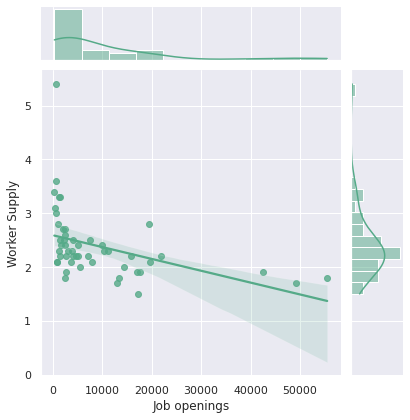

In [ ]:
sns.set_theme(style = "darkgrid", palette= "blend:#5A8,#5F6")
sns.jointplot(x= "Job openings", y= "Worker Supply", data=Cyber_jobs, kind='reg');

*From the graph below, one can see that the concentration of currently employed cybersecurity workers and the need for workers based on geographic area are very disproportionate. This is also additional evidence showing that the gap in cybersecurity entry level jobs exits. We see that the concentration of people currently employed in cybersecurity are around 10,000- 20,000. Which is way lesser that what the market needs.*

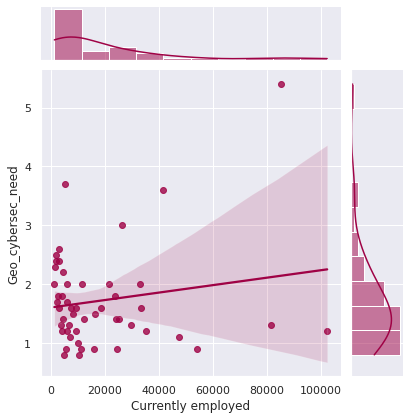

In [ ]:
sns.set_theme(style = "darkgrid", palette= "PuRd_r")
sns.jointplot(x= "Currently employed",y= "Geo_cybersec_need", data=Cyber_jobs, kind ="reg");